<a href="https://colab.research.google.com/github/Freya-LR/strategic_network/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, FigureCanvasPdf
from matplotlib.figure import Figure
import keras
from keras.models import Model ,Sequential 
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot

import warnings
import matplotlib.cbook
from IPython.display import SVG
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from google.colab import drive
drive.mount('/content/drive')


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:

with pd.ExcelFile('/content/drive/My Drive/output_values/output_n10_3.xlsx') as reader:
    
    closeness_n10_3=pd.read_excel(reader,sheet_name="closeness_centrality")
    betweenness_n10_3=pd.read_excel(reader,sheet_name="betweenness_centrality")
    eigenvector_n10_3=pd.read_excel(reader,sheet_name="eigenvector_centrality")
    page_rank_n10_3=pd.read_excel(reader,sheet_name="page_rank")
    triangles_n10_3=pd.read_excel(reader,sheet_name="triangles")
    clustering_n10_3=pd.read_excel(reader,sheet_name="clustering")
    wiener_index_n10_3=pd.read_excel(reader,sheet_name="wiener_index")
    transitivity_n10_3=pd.read_excel(reader,sheet_name="transitivity")
    diameter_radius_center_periphery_density_n10_3=pd.read_excel(reader,sheet_name="d_r_c_p_d")
    Efficiency_loss_n10_3=pd.read_excel(reader,sheet_name="Efficiency_loss")




In [19]:
def par(x):   
    
    X=np.delete(x.to_numpy(),obj=0,axis=1)

    return X

def com_data(n,closeness, betweenness, eigenvector,page_rank,triangles,clustering,wiener_index,transitivity,
             diameter_radius_center_periphery_density,Efficiency_loss):
    la=np.zeros((1000,3))
    for i in range(1000):
        la[i]=[wiener_index_n10_3[0][i],transitivity_n10_3[0][i],diameter_radius_center_periphery_density_n10_3[4][i]]
    #X=np.array(l)
    #Xa=np.array(la)
    Y = np.array(Efficiency_loss[0])
    l=np.zeros((1000,n,6))
    for i in range(1000):
        for j in range(n):
            l[i][j]=[closeness[j][i],betweenness[j][i],eigenvector[j][i],page_rank[j][i],triangles[j][i],clustering[j][i]]
    print(l.shape)
    print(Y.shape)
    print(la.shape)
    return l, la, Y

X, Xa, y=com_data(10, closeness_n10_3, betweenness_n10_3, eigenvector_n10_3,page_rank_n10_3,triangles_n10_3,clustering_n10_3,

        wiener_index_n10_3,transitivity_n10_3,diameter_radius_center_periphery_density_n10_3,Efficiency_loss_n10_3)


X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

#print(y_test)





(1000, 10, 6)
(1000,)
(1000, 3)


In [20]:
def DLSN(X,y):   
    #create model
    X_train = X[:-100]
    X_test = X[-100:]
    y_train = y[:-100]
    y_test = y[-100:]
    X_train=np.expand_dims(X_train, axis=3)
    X_test=np.expand_dims(X_test, axis=3)
    num_filters = 8
    filter_size = 3
    pool_size = 2

    model = Sequential([
      Conv2D(num_filters, filter_size, input_shape=(10, 6, 1)),
      MaxPooling2D(pool_size=pool_size),
      Flatten(),
      Dense(17, activation='relu'),
    ])
    model.compile(optimizer='adam', loss='mean_squared_error',)
    early_stopping_monitor = EarlyStopping(patience=3)
    model.fit(X_train, to_categorical(y_train), validation_data=(X_test, to_categorical(y_test)),
              epochs=30, callbacks=[early_stopping_monitor],)
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, to_categorical(y_test), verbose=0)
    print("test loss:", results)
    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`

    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:3])

    print(predictions)
    
    return model


model=DLSN(X,y)
y_test[:3]


Train on 900 samples, validate on 100 samples
Epoch 1/30
900/900 [==============================] - 0s 471us/step - loss: 4.9287 - val_loss: 0.6363
Epoch 2/30
900/900 [==============================] - 0s 51us/step - loss: 0.2105 - val_loss: 0.0702
Epoch 3/30
900/900 [==============================] - 0s 47us/step - loss: 0.0667 - val_loss: 0.0612
Epoch 4/30
900/900 [==============================] - 0s 47us/step - loss: 0.0622 - val_loss: 0.0598
Epoch 5/30
900/900 [==============================] - 0s 50us/step - loss: 0.0610 - val_loss: 0.0593
Epoch 6/30
900/900 [==============================] - 0s 49us/step - loss: 0.0603 - val_loss: 0.0590
Epoch 7/30
900/900 [==============================] - 0s 50us/step - loss: 0.0599 - val_loss: 0.0589
Epoch 8/30
900/900 [==============================] - 0s 47us/step - loss: 0.0596 - val_loss: 0.0589
Epoch 9/30
900/900 [==============================] - 0s 47us/step - loss: 0.0594 - val_loss: 0.0589
Epoch 10/30
900/900 [=======================

array([ 5.6, 11.2, 13. ])

Train on 900 samples, validate on 100 samples
Epoch 1/30
900/900 [==============================] - 0s 121us/step - loss: 64.6636 - val_loss: 42.0414
Epoch 2/30
900/900 [==============================] - 0s 37us/step - loss: 30.8511 - val_loss: 21.2473
Epoch 3/30
900/900 [==============================] - 0s 33us/step - loss: 16.2934 - val_loss: 11.8442
Epoch 4/30
900/900 [==============================] - 0s 33us/step - loss: 9.3567 - val_loss: 7.0312
Epoch 5/30
900/900 [==============================] - 0s 37us/step - loss: 5.6856 - val_loss: 4.3987
Epoch 6/30
900/900 [==============================] - 0s 33us/step - loss: 3.6204 - val_loss: 2.8564
Epoch 7/30
900/900 [==============================] - 0s 33us/step - loss: 2.3851 - val_loss: 1.9158
Epoch 8/30
900/900 [==============================] - 0s 34us/step - loss: 1.6228 - val_loss: 1.3253
Epoch 9/30
900/900 [==============================] - 0s 39us/step - loss: 1.1368 - val_loss: 0.9427
Epoch 10/30
900/900 [=================

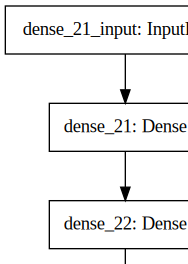

In [25]:
def DLSN_s(X,y):   
    #create model
    X_train = X[:-100]
    X_test = X[-100:]
    y_train = y[:-100]
    y_test = y[-100:]
    
    
    model = Sequential([
      Dense(10, activation='relu',input_shape=(3, )),
      Dense(10,activation='relu'),
      Dense(17),
    ])
    model.compile(optimizer='adam', loss='mean_squared_error',)
    early_stopping_monitor = EarlyStopping(patience=3)
    model.fit(X_train, to_categorical(y_train), validation_data=(X_test, to_categorical(y_test)),
              epochs=30, callbacks=[early_stopping_monitor],)
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, to_categorical(y_test), verbose=0)
    print("test loss:", results)
    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`

    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:3])

    print(predictions)
    
    return model


model_s=DLSN_s(Xa,y)
# Summary of neural network
model_s.summary()

# Output network visualization
SVG(model_to_dot(model_s).create(prog='dot', format='svg'))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 8, 4, 8)           80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 2, 8)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 17)                1105      
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


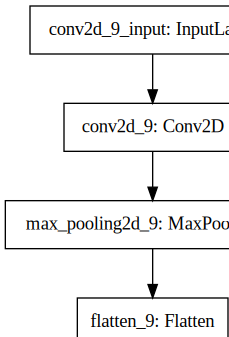

In [ ]:
# Summary of neural network
model.summary()

# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 0s 151us/step - loss: 0.2007 - val_loss: 0.0589
Epoch 2/30
800/800 [==============================] - 0s 61us/step - loss: 0.0580 - val_loss: 0.0579
Epoch 3/30
800/800 [==============================] - 0s 63us/step - loss: 0.0576 - val_loss: 0.0579
Epoch 4/30
800/800 [==============================] - 0s 62us/step - loss: 0.0576 - val_loss: 0.0586
Epoch 5/30
800/800 [==============================] - 0s 61us/step - loss: 0.0576 - val_loss: 0.0582
Evaluate on test data
test loss: 0.05815333008766174
Generate predictions for 3 samples
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.02648708
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.32064438
  0.         0.         0.         0.         

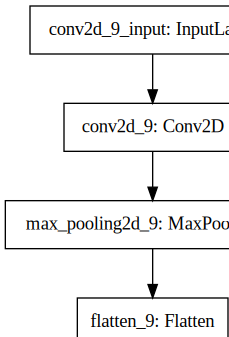

In [ ]:
def DLSN_mc(X,y):   
    #create model
    X_train = X[:-200]
    X_test = X[-200:]
    y_train = y[:-200]
    y_test = y[-200:]
    X_train=np.expand_dims(X_train, axis=3)
    X_test=np.expand_dims(X_test, axis=3)
    num_filters = 32
    filter_size = 4
    pool_size = 2

    model = Sequential([
      Conv2D(num_filters, filter_size, input_shape=(10, 6, 1)),
      MaxPooling2D(pool_size=pool_size),
      Flatten(),
      Dense(17, activation='relu'),
    ])
    model.compile(optimizer='adam', loss='mean_squared_error',)
    early_stopping_monitor = EarlyStopping(patience=3)
    model.fit(X_train, to_categorical(y_train), validation_data=(X_test, to_categorical(y_test)),
              epochs=30, callbacks=[early_stopping_monitor],)
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    results = model.evaluate(X_test, to_categorical(y_test), verbose=0)
    print("test loss:", results)
    # Generate predictions (probabilities -- the output of the last layer)
    # on new data using `predict`

    print("Generate predictions for 3 samples")
    predictions = model.predict(X_test[:7])

    print(predictions)
    
    return model


model_mc=DLSN_mc(X,y)
y_test[:7]
# Summary of neural network
model_mc.summary()

# Output network visualization
SVG(model_to_dot(model_mc).create(prog='dot', format='svg'))